# **한글 폰트 설치**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,902 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

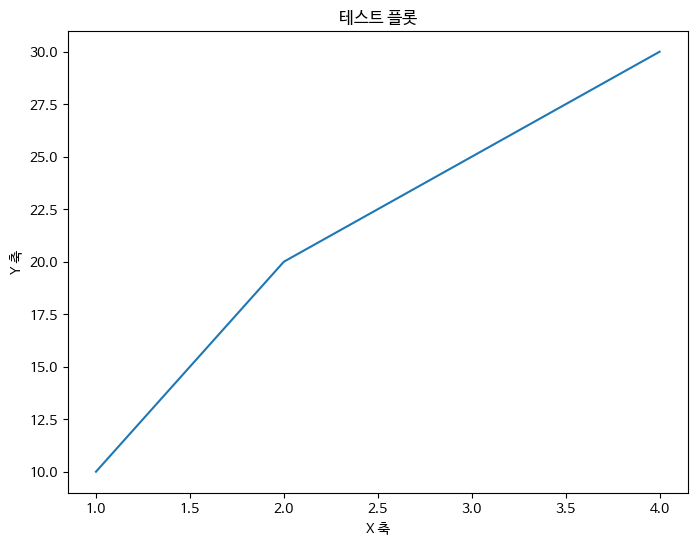

In [1]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 플롯 예시
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

# **데이터 불러오기**

In [2]:
import pandas as pd

train=pd.read_csv("/content/movies_train.csv")
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
test=pd.read_csv('/content/movies_test.csv')
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [4]:
sub=pd.read_csv("/content/submission.csv")
sub.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


# **시각화**

<Axes: ylabel='dir_prev_bfnum'>

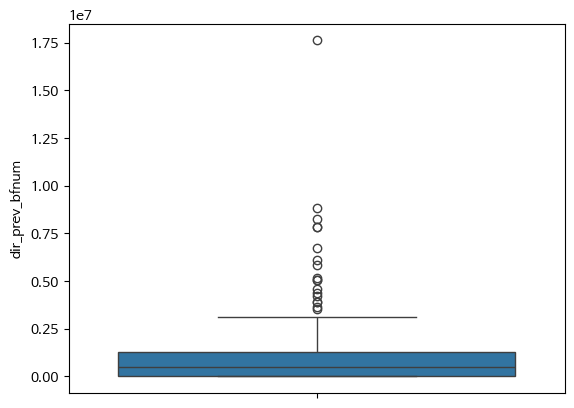

In [5]:
import seaborn as sns

sns.boxplot(train.dir_prev_bfnum) # 이상치 확인

<Axes: ylabel='time'>

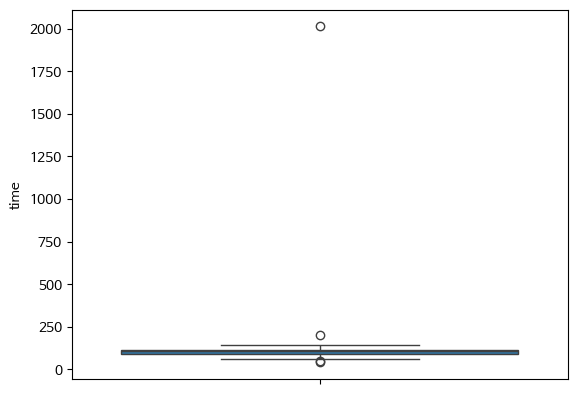

In [6]:
sns.boxplot(test.time) # 이상치 확인

# **train, test 데이터 전처리**

In [7]:
# 결측치 처리
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

# release_year, release_month 데이터 생성
train['release_time']=pd.to_datetime(train['release_time']) # dt method 사용을 위해 날짜 형식으로 변환
test['release_time']=pd.to_datetime(test['release_time'])
train['release_year']=pd.to_numeric(train['release_time'].dt.year)
test['release_year']=pd.to_numeric(test['release_time'].dt.year)
train['release_month']=pd.to_numeric(train['release_time'].dt.month)
test['release_month']=pd.to_numeric(test['release_time'].dt.month)

# 불필요한 피처 제거
train=train.drop(['title','director','release_time'], axis=1)
test=test.drop(['title','director','release_time'], axis=1)

# train 데이터 'dir_prev_bfnum' 이상치 삭제
train = train.sort_values(by='dir_prev_bfnum', ascending=False).iloc[1:]

# test 데이터 'time' 이상치 삭제
test.sort_values(by='time', ascending=False)[0]=63

In [8]:
# 중복 distributor 처리
def distr_preprocessing(x) :
    if 'CGV' in x or '무비꼴라쥬' in x :
        return 'CGV'
    elif 'E&M' in x or 'CJ엔터테인먼트' in x or 'CJ 엔터테인먼트' in x:
        return 'CJ E&M'
    elif '롯데' in x :
        return '롯데엔터테인먼트'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x or 'KT' in x:
        return '싸이더스'
    elif '마운틴' in x:
        return '마운틴픽쳐스'
    elif '메가박스' in x or '씨너스' in x:
        return '메가박스플러스엠'
    elif '쇼박스' in x or '(주)쇼박스' in x :
        return '쇼박스'
    elif '조이앤시네마' in x or '조이앤컨텐츠그룹' in x or '(주) 케이알씨지' in x or '드림팩트' in x:
        return '조이앤'
    elif '타임스토리' in x :
        return '타임스토리'
    elif '프리비젼' in x :
        return '프리비젼'
    elif '리틀빅픽' in x :
        return '리틀빅픽쳐스'
    elif '콘텐츠판다' in x or 'NEW' in x:
        return 'NEW'
    elif 'SK' in x:
        return 'SK'
    elif '마인스' in x:
        return '마인스'
    elif '에이원' in x:
        return '에이원'
    elif 'THE 픽쳐스' in x or '더픽쳐스' in x:
        return '더픽쳐스'
    elif '시네마 달' in x or '(주)시네마달' in x:
        return '시네마달'
    elif '와이드 릴리즈' in x or '와이드릴리즈' in x:
        return '와이드릴리즈'
    else :
        return x

train['distributor']=train['distributor'].apply(distr_preprocessing)
test['distributor']=test['distributor'].apply(distr_preprocessing)

In [9]:
# 상위 14개 배급사를 제외한 배급사는 '기타'로 처리
dist_train=train.distributor.value_counts()[:14]

def distributor_etc(x):
  if x in dist_train:
    return x
  else:
    return('기타')

train['distributor']=train['distributor'].apply(distributor_etc).apply(lambda x : distributor_etc(x))

dist_test = dist_train.index.tolist()
test['distributor'] = test['distributor'].apply(lambda x : x if x in dist_test else '기타')

상위 14개 배급사 : 롯데엔터테인먼트 쇼박스 NEW 조이앤 CJ E&M CGV 인디스토리 영화사 진진 마운틴픽쳐스 골든타이드픽처스 시너지 시네마달 싸이더스 어뮤즈

In [10]:
# 관객수 log 변환 데이터 생성
import numpy as np

train_log=train.copy()
train_log['box_off_num']=np.log1p(train_log['box_off_num'])

In [11]:
# 원핫인코딩
train=pd.get_dummies(train, columns=['genre','distributor','screening_rat','release_year','release_month'], drop_first=True)
train_log=pd.get_dummies(train_log, columns=['genre','distributor','screening_rat','release_year','release_month'], drop_first=True)
test=pd.get_dummies(test, columns=['genre','distributor','screening_rat','release_year','release_month'], drop_first=True)

train=train.astype(int)
train_log=train_log.astype(int)
test=test.astype(int)

# **train/log 변환 train 데이터 X, y로 나누기**

In [12]:
y_train=train['box_off_num']
X_train=train.drop(['box_off_num'], axis=1, inplace=False)

In [13]:
y_log_train=train_log['box_off_num']
X_log_train=train_log.drop(['box_off_num'], axis=1, inplace=False)

In [14]:
X_train.columns

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스',
       'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션',
       'genre_코미디', 'distributor_CGV', 'distributor_CJ E&M', 'distributor_NEW',
       'distributor_골든타이드픽처스', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'distributor_마운틴픽쳐스', 'distributor_쇼박스', 'distributor_시너지',
       'distributor_시네마달', 'distributor_싸이더스', 'distributor_어뮤즈',
       'distributor_인디스토리', 'distributor_조이앤', 'screening_rat_15세 관람가',
       'screening_rat_전체 관람가', 'screening_rat_청소년 관람불가', 'release_year_2011',
       'release_year_2012', 'release_year_2013', 'release_year_2014',
       'release_year_2015', 'release_month_2', 'release_month_3',
       'release_month_4', 'release_month_5', 'release_month_6',
       'release_month_7', 'release_month_8', 'release_month_9',
       'release_month_10', 'release_month_11', 'release_month_12'],
      

In [15]:
# 연속형 변수 선택
continuous_vars=['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']
# 원핫인코딩 변수 선택
one_hot_vars = ['genre_공포', 'genre_느와르', 'genre_다큐멘터리', 'genre_드라마', 'genre_멜로/로맨스',
       'genre_뮤지컬', 'genre_미스터리', 'genre_서스펜스', 'genre_애니메이션', 'genre_액션',
       'genre_코미디', 'distributor_CJ E&M', 'distributor_NEW',
       'distributor_골든타이드픽처스', 'distributor_기타', 'distributor_롯데엔터테인먼트',
       'distributor_마운틴픽쳐스', 'distributor_쇼박스', 'distributor_시너지',
       'distributor_시네마달', 'distributor_싸이더스', 'distributor_어뮤즈',
       'distributor_영화사 진진', 'distributor_인디스토리', 'distributor_조이앤',
       'screening_rat_15세 관람가', 'screening_rat_전체 관람가',
       'screening_rat_청소년 관람불가', 'release_year_2011', 'release_year_2012',
       'release_year_2013', 'release_year_2014', 'release_year_2015',
       'release_month_2', 'release_month_3', 'release_month_4',
       'release_month_5', 'release_month_6', 'release_month_7',
       'release_month_8', 'release_month_9', 'release_month_10',
       'release_month_11', 'release_month_12']

In [16]:
# standard scaling
X_standard_train=X_train.copy()
X_log_standard_train=X_log_train.copy()
standard_test=test.copy()

from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
X_standard_train[continuous_vars]=standard_scaler.fit_transform(X_standard_train[continuous_vars])
X_log_standard_train[continuous_vars]=standard_scaler.fit_transform(X_log_standard_train[continuous_vars])
standard_test[continuous_vars]=standard_scaler.fit_transform(standard_test[continuous_vars])

In [17]:
# minmax scaling
X_minmax_train=X_train.copy()
minmax_test=test.copy()
X_log_minmax_train=X_log_train.copy()

from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
X_minmax_train[continuous_vars]=minmax_scaler.fit_transform(X_minmax_train[continuous_vars])
X_log_minmax_train[continuous_vars]=minmax_scaler.fit_transform(X_log_minmax_train[continuous_vars])
minmax_test[continuous_vars]=minmax_scaler.fit_transform(minmax_test[continuous_vars])

# **모델링 및 하이퍼파라미터 튜닝**

## XGBoost (로그 변환 x, scaling x)

In [19]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor(random_state=42)

from sklearn.model_selection import GridSearchCV
xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [500, 1000, 1500],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.4, 0.5, 0.6],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_reg_grid.fit(X_train, y_train)
print("xgb_reg_grid 최적 파라미터:", xgb_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_reg_grid.best_score_))

xgb_reg_grid 최적 파라미터: {'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.5}
RMSE: 1302517.7636


## LightGBM (로그 변환 x, scaling x)

In [20]:
from lightgbm import LGBMRegressor
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [4, 5, 6], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.1, 0.3, 0.5]
    }
lgb_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_reg_grid.fit(X_train, y_train)
print("lgb_reg_grid 최적 파라미터:", lgb_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## XGBoost (로그 변환 x, standard scaling)

In [21]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [200, 300, 500],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.5, 0.6, 0.7],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_standard_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_standard_reg_grid.fit(X_standard_train, y_train)
print("xgb_standard_reg_grid 최적 파라미터:", xgb_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_standard_reg_grid.best_score_))

xgb_standard_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.7}
RMSE: 1292107.3953


## LightGBM (로그 변환 x, standard scaling)

In [22]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [3, 4, 5], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_standard_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_standard_reg_grid.fit(X_standard_train, y_train)
print("lgb_standard_reg_grid 최적 파라미터:", lgb_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_standard_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## XGBoost (로그 변환 x, minmax scaling)

In [23]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [200, 300, 500],
    'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.5, 0.6, 0.7],
    'colsample_bytree' : [0.4, 0.5, 0.6], 'gamma' : [0, 1, 2]
    }

xgb_minmax_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_minmax_reg_grid.fit(X_minmax_train, y_train)
print("xgb_minmax_reg_grid 최적 파라미터:", xgb_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_minmax_reg_grid.best_score_))

xgb_minmax_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.7}
RMSE: 1292107.3953


## LightGBM (로그 변환 x, minmax scaling)

In [24]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [4, 5, 6], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.1, 0.3, 0.5]
    }
lgb_minmax_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_minmax_reg_grid.fit(X_minmax_train, y_train)
print("lgb_minmax_reg_grid 최적 파라미터:", lgb_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_minmax_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## XGBoost (로그 변환 o, scaling x)

In [25]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.3], 'subsample' : [0.6, 0.7, 0.8],
    'colsample_bytree' : [0.5, 0.6, 0.7], 'gamma' : [0, 1, 2]
    }

xgb_log_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_log_reg_grid.fit(X_log_train, y_log_train)
print("xgb_log_reg_grid 최적 파라미터:", xgb_log_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_log_reg_grid.best_score_))

xgb_log_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
RMSE: 1.8521


## LightGBM (로그 변환 o, scaling x)

In [26]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [5, 6, 7], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_log_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_log_reg_grid.fit(X_log_train, y_log_train)
print("lgb_log_reg_grid 최적 파라미터:", lgb_log_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_log_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## XGBoost (로그 변환 o, standard scaling)

In [27]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [2, 3, 4], 'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.1, 0.3], 'subsample' : [0.8, 0.9, 1],
    'colsample_bytree' : [0.5, 0.6, 0.7], 'gamma' : [0, 1, 2]
    }

xgb_log_standard_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_log_standard_reg_grid.fit(X_log_standard_train, y_log_train)
print("xgb_log_standard_reg_grid 최적 파라미터:", xgb_log_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_log_standard_reg_grid.best_score_))

xgb_log_standard_reg_grid 최적 파라미터: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
RMSE: 1.8505


## LightGBM (로그 변환 o, standard scaling)

In [28]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [3, 4, 5], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_log_standard_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_log_standard_reg_grid.fit(X_log_standard_train, y_log_train)
print("lgb_log_standard_reg_grid 최적 파라미터:", lgb_log_standard_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_log_standard_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## XGBoost (로그 변환 o, minmax scaling)

In [29]:
xgb_reg=XGBRegressor(random_state=42)

xgb_param_grid={
    'max_depth' : [4, 5, 6], 'n_estimators' : [50, 100, 500],
    'learning_rate' : [0.01, 0.1, 0.3], 'subsample' : [0.6, 0.7, 0.8],
    'colsample_bytree' : [0.7, 0.8, 0.9], 'gamma' : [2, 3, 4]
    }

xgb_log_minmax_reg_grid=GridSearchCV(xgb_reg, param_grid = xgb_param_grid, scoring='neg_root_mean_squared_error')
xgb_log_minmax_reg_grid.fit(X_log_minmax_train, y_log_train)
print("xgb_log_minmax_reg_grid 최적 파라미터:", xgb_log_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* xgb_log_minmax_reg_grid.best_score_))

xgb_log_minmax_reg_grid 최적 파라미터: {'colsample_bytree': 0.8, 'gamma': 4, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.7}
RMSE: 1.8377


## LightGBM (로그 변환 o, minmax scaling)

In [30]:
lgb_reg=LGBMRegressor(random_state=42)

lgb_param_grid={
    'max_depth' : [5, 6, 7], 'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.01, 0.1, 0.3]
    }
lgb_log_minmax_reg_grid=GridSearchCV(lgb_reg, param_grid = lgb_param_grid, error_score='raise', scoring='neg_root_mean_squared_error')
lgb_log_minmax_reg_grid.fit(X_log_minmax_train, y_log_train)
print("lgb_log_minmax_reg_grid 최적 파라미터:", lgb_log_minmax_reg_grid.best_params_)
print('RMSE: {0:.4f}'.format(-1* lgb_log_minmax_reg_grid.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 479, number of used features: 37
[LightGBM] [Info] Start training from score 9.711900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

# **예측**

---

**점수가 가장 높은 모델 : XGBoost (로그 변환 x, scaling x) 1209474.3246585126**

In [56]:
xgb_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=2, n_estimators=1000, subsample=0.5)
xgb_reg.fit(X_train, y_train)
xgb_pred=xgb_reg.predict(test)

lgb_reg=LGBMRegressor(learning_rate=0.3, max_depth=6, n_estimators=10, random_state=42)
lgb_reg.fit(X_train, y_train)
lgb_pred=lgb_reg.predict(test)

xgb_sub=sub.copy()
xgb_sub['box_off_num']=xgb_pred
xgb_sub['box_off_num'][xgb_sub['box_off_num']<0]=0
lgb_sub=sub.copy()
lgb_sub['box_off_num']=lgb_pred
lgb_sub['box_off_num'][lgb_sub['box_off_num']<0]=0

xgb_sub.to_csv('xgb_sub0531(2).csv', index=False)
lgb_sub.to_csv('lgb_sub0531.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 40
[LightGBM] [Info] Start training from score 709364.011686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

<ipython-input-56-46e47933a08f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_sub['box_off_num'][xgb_sub['box_off_num']<0]=0
<ipython-input-56-46e47933a08f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_sub['box_off_num'][lgb_sub['box_off_num']<0]=0


In [48]:
xgb_standard_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=2, n_estimators=200, subsample=0.7, random_state=42)
xgb_standard_reg.fit(X_standard_train, y_train)
xgb_standard_pred=xgb_standard_reg.predict(standard_test)

lgb_standard_reg=LGBMRegressor(learning_rate=0.1, max_depth=5, n_estimators=50, random_state=42)
lgb_standard_reg.fit(X_standard_train, y_train)
lgb_standard_pred=lgb_standard_reg.predict(standard_test)

xgb_standard_sub=sub.copy()
xgb_standard_sub['box_off_num']=xgb_standard_pred
xgb_standard_sub['box_off_num'][xgb_standard_sub['box_off_num']<0]=0
lgb_standard_sub=sub.copy()
lgb_standard_sub['box_off_num']=lgb_standard_pred
lgb_standard_sub['box_off_num'][lgb_standard_sub['box_off_num']<0]=0

xgb_standard_sub.to_csv('xgb_standard_sub0531.csv', index=False)
lgb_standard_sub.to_csv('lgb_standard_sub0531.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 40
[LightGBM] [Info] Start training from score 709364.011686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

<ipython-input-48-e23d5fb3a789>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_standard_sub['box_off_num'][xgb_standard_sub['box_off_num']<0]=0
<ipython-input-48-e23d5fb3a789>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_standard_sub['box_off_num'][lgb_standard_sub['box_off_num']<0]=0


In [50]:
xgb_minmax_reg=XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=2, n_estimators=200, subsample=0.7, random_state=42)
xgb_minmax_reg.fit(X_minmax_train, y_train)
xgb_minmax_pred=xgb_minmax_reg.predict(minmax_test)

lgb_minmax_reg=LGBMRegressor(learning_rate=0.3, max_depth=6, n_estimators=10, random_state=42)
lgb_minmax_reg.fit(X_minmax_train, y_train)
lgb_minmax_pred=lgb_minmax_reg.predict(minmax_test)

xgb_minmax_sub=sub.copy()
xgb_minmax_sub['box_off_num']=xgb_minmax_pred
xgb_minmax_sub['box_off_num'][xgb_minmax_sub['box_off_num']<0]=0
lgb_minmax_sub=sub.copy()
lgb_minmax_sub['box_off_num']=lgb_minmax_pred
lgb_minmax_sub['box_off_num'][lgb_minmax_sub['box_off_num']<0]=0

xgb_minmax_sub.to_csv('xgb_minmax_sub0531.csv', index=False)
lgb_minmax_sub.to_csv('lgb_minmax_sub0531.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 40
[LightGBM] [Info] Start training from score 709364.011686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

<ipython-input-50-1720b3adbf32>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_minmax_sub['box_off_num'][xgb_minmax_sub['box_off_num']<0]=0
<ipython-input-50-1720b3adbf32>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_minmax_sub['box_off_num'][lgb_minmax_sub['box_off_num']<0]=0


In [52]:
xgb_log_reg=XGBRegressor(colsample_bytree=0.5, gamma=2, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6, random_state=42)
xgb_log_reg.fit(X_log_train, y_log_train)
xgb_log_pred=xgb_log_reg.predict(test)
xgb_log_pred=np.exp(xgb_log_pred)-1

lgb_log_reg=LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=50, random_state=42)
lgb_log_reg.fit(X_log_train, y_log_train)
lgb_log_pred=lgb_log_reg.predict(test)
lgb_log_pred=np.exp(lgb_log_pred)-1

xgb_log_sub=sub.copy()
xgb_log_sub['box_off_num']=xgb_log_pred
xgb_log_sub['box_off_num'][xgb_log_sub['box_off_num']<0]=0
lgb_log_sub=sub.copy()
lgb_log_sub['box_off_num']=lgb_log_pred
lgb_log_sub['box_off_num'][lgb_log_sub['box_off_num']<0]=0

xgb_log_sub.to_csv('xgb_log_sub0531.csv', index=False)
lgb_log_sub.to_csv('lgb_log_sub0531.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 40
[LightGBM] [Info] Start training from score 9.465776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

<ipython-input-52-4cf51e5679ac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_log_sub['box_off_num'][xgb_log_sub['box_off_num']<0]=0
<ipython-input-52-4cf51e5679ac>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_log_sub['box_off_num'][lgb_log_sub['box_off_num']<0]=0


In [54]:
xgb_log_standard_reg=XGBRegressor(colsample_bytree=0.5, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1, random_state=42)
xgb_log_standard_reg.fit(X_log_standard_train, y_log_train)
xgb_log_standard_pred=xgb_log_standard_reg.predict(test)
xgb_log_standard_pred=np.exp(xgb_log_standard_pred)-1

lgb_log_standard_reg=LGBMRegressor(learning_rate=0.1, max_depth=5, n_estimators=50, random_state=42)
lgb_log_standard_reg.fit(X_log_standard_train, y_log_train)
lgb_log_standard_pred=lgb_log_standard_reg.predict(test)
lgb_log_standard_pred=np.exp(lgb_log_standard_pred)-1

xgb_log_standard_sub=sub.copy()
xgb_log_standard_sub['box_off_num']=xgb_log_standard_pred
xgb_log_standard_sub['box_off_num'][xgb_log_standard_sub['box_off_num']<0]=0
lgb_log_standard_sub=sub.copy()
lgb_log_standard_sub['box_off_num']=lgb_log_standard_pred
lgb_log_standard_sub['box_off_num'][lgb_log_standard_sub['box_off_num']<0]=0

xgb_log_standard_sub.to_csv('xgb_log_standard_sub0531.csv', index=False)
lgb_log_standard_sub.to_csv('lgb_log_standard_sub0531.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 40
[LightGBM] [Info] Start training from score 9.465776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

<ipython-input-54-42b329198a4e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_log_standard_sub['box_off_num'][xgb_log_standard_sub['box_off_num']<0]=0
<ipython-input-54-42b329198a4e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_log_standard_sub['box_off_num'][lgb_log_standard_sub['box_off_num']<0]=0


In [55]:
xgb_log_minmax_reg=XGBRegressor(colsample_bytree=0.8, gamma=4, learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.7, random_state=42)
xgb_log_minmax_reg.fit(X_log_minmax_train, y_log_train)
xgb_log_minmax_pred=xgb_log_minmax_reg.predict(test)
xgb_log_minmax_pred=np.exp(xgb_log_minmax_pred)-1

lgb_log_minmax_reg=LGBMRegressor(learning_rate=0.1, max_depth=6, n_estimators=50, random_state=42)
lgb_log_minmax_reg.fit(X_log_minmax_train, y_log_train)
lgb_log_minmax_pred=lgb_log_minmax_reg.predict(test)
lgb_log_minmax_pred=np.exp(lgb_log_minmax_pred)-1

xgb_log_minmax_sub=sub.copy()
xgb_log_minmax_sub['box_off_num']=xgb_log_minmax_pred
xgb_log_minmax_sub['box_off_num'][xgb_log_minmax_sub['box_off_num']<0]=0
lgb_log_minmax_sub=sub.copy()
lgb_log_minmax_sub['box_off_num']=lgb_log_minmax_pred
lgb_log_minmax_sub['box_off_num'][lgb_log_minmax_sub['box_off_num']<0]=0

xgb_log_minmax_sub.to_csv('xgb_log_minmax_sub0531.csv', index=False)
lgb_log_minmax_sub.to_csv('lgb_log_minmax_sub0531.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 599, number of used features: 40
[LightGBM] [Info] Start training from score 9.465776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

<ipython-input-55-6962d3782246>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_log_minmax_sub['box_off_num'][xgb_log_minmax_sub['box_off_num']<0]=0
<ipython-input-55-6962d3782246>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_log_minmax_sub['box_off_num'][lgb_log_minmax_sub['box_off_num']<0]=0
